In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', None) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dataset = [train, test]

# Let's get a summary of our datasets

print('Entries in training set: ', len(train), '\nEntries in testing set: ',len(test))

for df in dataset:
    print(df.isna().sum())

# A combination of training and test dataset would be helpful in data analysis

train_test_comb = pd.concat([train, test], axis=0)

Entries in training set:  891 
Entries in testing set:  418
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Feature Engineering Section

### Get Data Info: Check for NaNs

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


NOTE: We will have to fill the empty data, cabin number is too low quality, since most points are missing. We will delete this feature

NOTE 2: We believe that cabin number, ticket number and where a person boarded do not contribute to their survival, any correlation between these features is pure noise and does not in any way imply causation. Perhaps cabin number, but we have no way of knowing if a person was in their cabin when the sinking happened...

In [7]:
for df in dataset:
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df.Sex.replace({'female':0, 'male': 1}, inplace=True)
    df['FamSize']=df['SibSp']+df['Parch']
    df.drop(['Cabin','Ticket','SibSp','Parch','Embarked'],axis=1,inplace=True)

We fill the data with the mean, do note that the distribution does not resemble a normal one.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC6EA28CF8>,
      dtype=object)

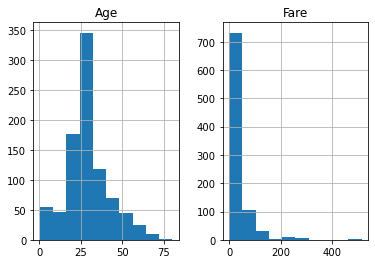

In [11]:
train[['Age','Fare']].hist()

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,0


### Identify titles of each person

In [13]:
for df in dataset:
    df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    print(list(df['Title'].unique()))
    # Replace the titles that has less than 20 ocurrences with 'Misc'
    title_names = (df['Title'].value_counts()> 5) #this will create a true false series with title name as index
    df['Title'] = df['Title'].apply(lambda x: x if title_names.loc[x] == True else 'Misc')
    df.drop(['Name'],axis=1,inplace=True)
print(train['Title'].value_counts())


['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']
Mr        517
Miss      182
Mrs       125
Master     40
Misc       14
Dr          7
Rev         6
Name: Title, dtype: int64


NOTE: A curiosity from looking at the data we find that ALL priests/reverends on board perished on the accident...

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize,Title
0,1,0,3,1,22.0,7.2500,S,1,Mr
1,2,1,1,0,38.0,71.2833,C,1,Mrs
2,3,1,3,0,26.0,7.9250,S,0,Miss
3,4,1,1,0,35.0,53.1000,S,1,Mrs
4,5,0,3,1,35.0,8.0500,S,0,Mr


In [15]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamSize
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,-0.549500,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.182333,-0.200988
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,1.000000,0.217138
FamSize,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.217138,1.000000


Note that sex is highly correlated to survival

### Create discrete categories for fare and age **i.e.** young, child, adult, senior (based on quartiles)

In [16]:
for df in dataset:
    df['Fare_cat'] = pd.qcut(df['Fare'], q=4, labels=(1,2,3,4))
    df['Age_cat'] = pd.qcut(df['Age'], q=4, labels=(1,2,3,4))
    df.drop(['Fare','Age'],axis=1,inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamSize,Title,Fare_cat,Age_cat
0,1,0,3,1,S,1,Mr,1,1
1,2,1,1,0,C,1,Mrs,4,4
2,3,1,3,0,S,0,Miss,2,2
3,4,1,1,0,S,1,Mrs,4,3
4,5,0,3,1,S,0,Mr,2,3


In [18]:
counts = train["Age_cat"].value_counts()
percent100 = train["Age_cat"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)

   counts Percent
2     330   37.0%
1     231   25.9%
4     217   24.4%
3     113   12.7%


### Convert features to numbers, also make family size a categorical variable

In [23]:
for df in dataset:
    # Convert category dtypes to integers
    df['Age_cat'] = df['Age_cat'].astype(np.int32)
    df['Fare_cat'] = df['Fare_cat'].astype(np.int32)
    # lambda function to change the values of 'Familysize'
    df['FamSize'] = df['FamSize'].apply(lambda x: 'Alone' if x==0 else('Small' if x>0 and x<5 else('Medium' if x>=5 and x<7 else 'Large')))

### Do one-hot encoding on the features

In [24]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

features = ['Age_cat', 'Fare_cat', 'Pclass', 'Sex', 'Title', 'FamSize']
encoded_features = []

for df in dataset:
  for feature in features:
    encoded = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
    cols = [f'{feature}_{n}' for idx, n in enumerate(df[feature].unique())]
    encoded_df = pd.DataFrame(encoded, columns=cols)
    encoded_df.index = df.index
    encoded_features.append(encoded_df)

train_one = pd.concat([train, *encoded_features[:6]], axis=1)
test_one = pd.concat([test, *encoded_features[6:]], axis=1)

dataset = [train_one, test_one]

### Drop redundant features, now that we did one-hot encoding they are not needed

In [25]:
for df in dataset:
    df.drop(['Pclass','Sex','FamSize','Title'],axis=1,inplace=True)

## Train and test data split 

In [26]:
from sklearn.model_selection import train_test_split

features = [x for x in train_one.columns if x!='Survived']

x = train_one[features].to_numpy()
y = train_one['Survived'].to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = int(0.85*len(train_one)), shuffle=False ,random_state=1912)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(757, 27) (757,) (134, 27) (134,)


### Test the data on a random forest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

clf = RandomForestClassifier(criterion='gini', 
                        n_estimators=300,
                        max_depth=4,
                        min_samples_split=4,
                        min_samples_leaf=7,
                        max_features='auto',
                        oob_score=True,
                        random_state=1400,
                        n_jobs=-1)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_val)

cm = confusion_matrix(y_val, y_pred)
print(cm)
print(classification_report(y_val, y_pred))

[[76 11]
 [14 33]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        87
           1       0.75      0.70      0.73        47

    accuracy                           0.81       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.81      0.81      0.81       134



In [28]:
newcols=np.zeros(len(test_one))
test_one['Title_Dr']=newcols
test_one['Title_Rev']=newcols
indexes=pd.DataFrame(test_one.index.values)
indexes.head()

,0
0,0
1,1
2,2
3,3
4,4


In [30]:
test_data = test_one[features].to_numpy()

prediction_clf = clf.predict(test_data)
print(len(prediction_clf))

output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction_clf})
output.to_csv('my_submission.csv', index=False)

418
